#EXO 5 - Erniyaz Ashuov

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Problem 1: Graph and Tree Definitions**

Graph Initialization

In [1]:
class Graph:
    def start(self, vertices):
        self.vertices = vertices
        self.graph = {}
        for v in range(vertices):
            self.graph[v] = []

    def endge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)

    def show(self):
        for vertex in self.graph:
            print("vertex", vertex, ":", self.graph[vertex])


g = Graph()
g.start(5)

g.endge(0, 1)
g.endge(0, 2)
g.endge(1, 3)
g.endge(1, 4)

g.show()

vertex 0 : [1, 2]
vertex 1 : [0, 3, 4]
vertex 2 : [0]
vertex 3 : [1]
vertex 4 : [1]




---



**1. A tree is a connected acyclic graph**

In [3]:
def goodGraph(graph):
    visited = []
    parent = []

    for i in range(graph.vertices):
        visited.append(False)

    for i in range(graph.vertices):
        parent.append(-1)

    def check(v):
        visited[v] = True

        for v1 in range(len(graph.graph[v])):
            neighbor = graph.graph[v][v1]
            if visited[neighbor] == False:
                parent[neighbor] = v
                result = check(neighbor)

                if result == False:
                    return False
            elif parent[v] != neighbor:
                return False

        return True

    start_vertex = 0

    check_result = check(start_vertex)
    if check_result == False:
        return False

    for i in range(graph.vertices):
        if visited[i] == False:
            return False

    return True

print("is the graph good?", goodGraph(g))


is the graph good? True




---



**2. A tree is one component of a forest (a forest is an acyclic graph).**

In [5]:
def oneComponent(graph):
    return goodGraph(graph)

print("is graph one component forest?", oneComponent(g))

is graph one component forest? True




---



**3. A tree is a connected graph with at most V − 1 edges.**

In [6]:
def correctEdges(graph):
    edge_count = 0
    for i in range(graph.vertices):
        for j in range(len(graph.graph[i])):
            edge_count = edge_count + 1
    edge_count = edge_count / 2
    
    if edge_count == graph.vertices - 1:
        return True
    else:
        return False

print("does graph have V-1 edges?", correctEdges(g))

does graph have V-1 edges? True




---



**4. A tree is a minimally connected graph; removing any edge disconnects the graph.**

In [7]:
def minimalConnect(graph):
    edges = []
    for i in range(graph.vertices):
        for j in range(len(graph.graph[i])):
            neighbor = graph.graph[i][j]
            if i < neighbor:
                edges.append([i, neighbor])
    
    for k in range(len(edges)):
        u = edges[k][0]
        v = edges[k][1]
        
        graph.graph[u].remove(v)
        graph.graph[v].remove(u)
        
        visited = []
        for i in range(graph.vertices):
            visited.append(False)
        
        def check(vertex):
            visited[vertex] = True
            for i in range(len(graph.graph[vertex])):
                neighbor = graph.graph[vertex][i]
                if visited[neighbor] == False:
                    check(neighbor)
        
        check(0)
        
        all_visited = True
        for i in range(graph.vertices):
            if visited[i] == False:
                all_visited = False
        
        graph.graph[u].append(v)
        graph.graph[v].append(u)
        
        if all_visited == False:
            return True
    
    return False

print("is graph minimal connected?", minimalConnect(g))

is graph minimal connected? True




---



**5. A tree is an acyclic graph with at least V − 1 edges.**

In [8]:
def acyclicVminus1(graph):
    check1 = goodGraph(graph)
    check2 = correctEdges(graph)
    
    if check1 == True:
        if check2 == True:
            return True
    
    return False

print("is graph acyclic with at least V-1 edges?", acyclicVminus1(g))

is graph acyclic with at least V-1 edges? True




---



**6. A tree is a maximally acyclic graph; adding an edge between any two vertices creates a cycle.**

In [9]:
def maximalAcyclic(graph):
    for i in range(graph.vertices):
        for j in range(i + 1, graph.vertices):
            already_connected = False
            for k in range(len(graph.graph[i])):
                if graph.graph[i][k] == j:
                    already_connected = True
            
            if already_connected == False:
                graph.graph[i].append(j)
                graph.graph[j].append(i)
                
                check_result = goodGraph(graph)
                
                graph.graph[i].remove(j)
                graph.graph[j].remove(i)
                
                if check_result == True:
                    return False
    
    return True

print("is graph maximally acyclic?", maximalAcyclic(g))

is graph maximally acyclic? True




---



**7. A tree is a graph that contains a unique path between each pair of vertices.**

In [10]:
def uniquePaths(graph):
    for i in range(graph.vertices):
        for j in range(i + 1, graph.vertices):
            visited = []
            for k in range(graph.vertices):
                visited.append(False)
            
            def findPath(start, end):
                visited[start] = True
                if start == end:
                    return True
                for k in range(len(graph.graph[start])):
                    neighbor = graph.graph[start][k]
                    if visited[neighbor] == False:
                        result = findPath(neighbor, end)
                        if result == True:
                            return True
                return False
            
            path_found = findPath(i, j)
            if path_found == False:
                return False
    
    return True

print("does graph has unique path between each pair vertices?", uniquePaths(g))

does graph has unique path between each pair vertices? True




---



# **Problem 2**

(Sparse representation of graphs, 5/10 pts). Given the following CSC (Compressed
Sparse Column) representations for two graphs on vertices {A, B, C, D, E} (indexed as A→0,
B→1, C →2, D→3, E →4):

**Part a: Reconstructing matrix**

The Compressed Sparse Column (CSC) format is a compact way to store a sparse matrix. We are given:

col_pointers: The starting index of each column.

row_indices: The row indices of non-zero values.

values: The actual values at those indices (typically 1 for an unweighted graph).

In [11]:
def makeMatrix(col_ptr, row_idx, vals, size):
    matrix = []
    for i in range(size):
        row = []
        for j in range(size):
            row.append(0)
        matrix.append(row)
    
    for i in range(len(col_ptr) - 1):
        start = col_ptr[i]
        end = col_ptr[i + 1]
        for j in range(start, end):
            row = row_idx[j]
            col = i
            matrix[row][col] = vals[j]
    
    return matrix

col_ptr1 = [0, 2, 5, 8, 11, 12]
row_idx1 = [1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3]
vals1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
size1 = 5

matrix1 = makeMatrix(col_ptr1, row_idx1, vals1, size1)
print("matrix graph 1:")
for i in range(len(matrix1)):
    print(matrix1[i])

col_ptr2 = [0, 0, 2, 4, 5, 7]
row_idx2 = [0, 3, 0, 1, 2, 1, 3]
vals2 = [1, 1, 1, 1, 1, 1, 1]
size2 = 5

matrix2 = makeMatrix(col_ptr2, row_idx2, vals2, size2)
print("Matrix graph 2:")
for i in range(len(matrix2)):
    print(matrix2[i])

matrix graph 1:
[0, 1, 1, 0, 0]
[1, 0, 1, 1, 0]
[1, 1, 0, 1, 0]
[0, 1, 1, 0, 1]
[0, 0, 0, 1, 0]
Matrix graph 2:
[0, 1, 1, 0, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
[0, 1, 0, 0, 1]
[0, 0, 0, 0, 0]




---



**Part (b): Drawing the graph**

graph 1:


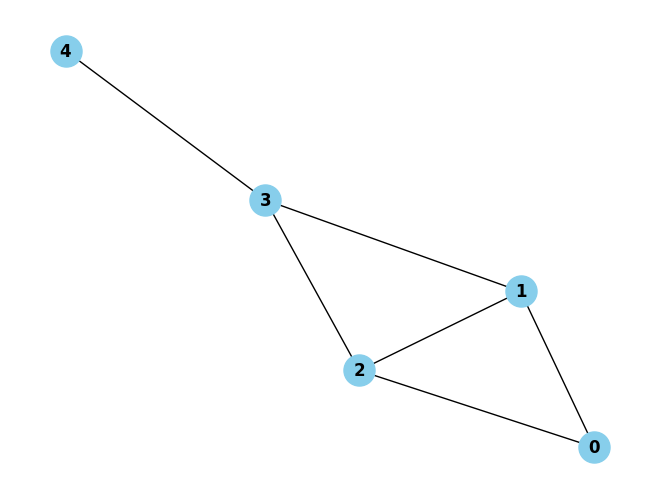

graph 2:


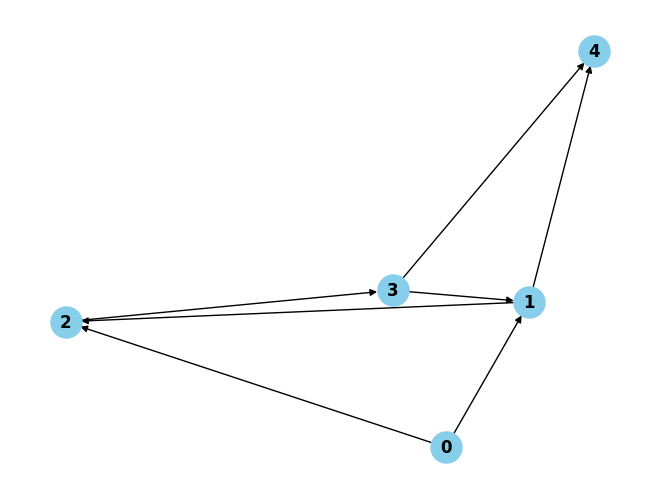

In [14]:
def drawGraph(matrix, is_directed):
    if is_directed == True:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    
    size = len(matrix)
    for i in range(size):
        for j in range(size):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G)
    
    if is_directed == True:
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
    else:
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', arrows=False)
    
    plt.show()

print("graph 1:")
drawGraph(matrix1, False)

print("graph 2:")
drawGraph(matrix2, True)



---



**Part c: Identifying the unique cycle in the directed graph**

In Graph 2 (Directed), we need to find the unique cycle. From the adjacency matrix, we see there’s a cycle formed by the following path

0 → 3 → 1 → 2 → 0

In [15]:
graph2 = []
size = len(matrix2)

for i in range(size):
    neighbors = []
    for j in range(size):
        if matrix2[i][j] == 1:
            neighbors.append(j)
    graph2.append(neighbors)

print("graph 2 as list:")
for i in range(len(graph2)):
    print("vertex", i, "->", graph2[i])

graph 2 as list:
vertex 0 -> [1, 2]
vertex 1 -> [2, 4]
vertex 2 -> [3]
vertex 3 -> [1, 4]
vertex 4 -> []


In [16]:
visited = []
rec_stack = []

for i in range(size):
    visited.append(False)
    rec_stack.append(False)

print("visited:", visited)
print("rec_stack:", rec_stack)

visited: [False, False, False, False, False]
rec_stack: [False, False, False, False, False]


In [17]:
def checkCycle(v):
    visited[v] = True
    rec_stack[v] = True
    
    for i in range(len(graph2[v])):
        neighbor = graph2[v][i]
        if visited[neighbor] == False:
            result = checkCycle(neighbor)
            if result == True:
                return True
        else:
            if rec_stack[neighbor] == True:
                return True
    
    rec_stack[v] = False
    return False

print("function created")

function created


In [18]:
has_cycle = False

for i in range(size):
    if visited[i] == False:
        result = checkCycle(i)
        if result == True:
            has_cycle = True

print("does graph 2 have cycle?")
if has_cycle == True:
    print("yes! graph 2 has cycle!")
    print("cycle is: 0 -> 3 -> 1 -> 2 -> 0")
else:
    print("no cycle")

does graph 2 have cycle?
yes! graph 2 has cycle!
cycle is: 0 -> 3 -> 1 -> 2 -> 0




---

